# Setup

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import random as rd
import os
from tqdm import tqdm
import tensorflow_addons as tfa
import pandas as pd
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar


plt.style.use(['science','ieee'])

os.chdir('/home/mathis/Stage M1/')

2022-06-09 15:00:16.607381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-09 15:00:16.607488: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Model

In [2]:
fnc_activation = 'relu'
fnc_activation_output = 'sigmoid'
inputs = tf.keras.Input(shape=(1,), dtype='float32')
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(inputs)
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(x)
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(x)
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(x)
x = keras.layers.Dense(100, trainable=True, activation=fnc_activation)(x)
outputs = keras.layers.Dense(19, activation=fnc_activation_output)(x)
model = tf.keras.Model(inputs,outputs)

lr = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

model.summary()



loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=False, reduction='sum_over_batch_size')
#False pour une probabilité ie [0;1]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 19)                1919  

2022-06-09 15:00:21.412602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-09 15:00:21.412631: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-09 15:00:21.412652: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MPC): /proc/driver/nvidia/version does not exist
2022-06-09 15:00:21.413470: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Initial training

In [4]:
path = 'Advanced NN/AL/AL_run/'
folder_r = '2022-06-09-06:25:27/'
file = 'K_pool.csv'

import csv

with open(path+folder_r+file) as f:
    f.readline()
    data = csv.reader(f, delimiter='\t')
    data = list(data)
    

input_pred = []
output_param = []

for i in data:
    input_pred.append(float(i[-1]))
    output_param.append([float(i[j]) for j in range(19)])

In [5]:
print(len(input_pred),len(output_param))
print(input_pred[0],output_param[0])

500000 500000
0.0 [0.3066120165389131, 0.44958650929318666, 0.23592232019813042, 0.7394182530355405, 0.9003227697596179, 0.5354988343407834, 0.9789974647335884, 0.5329378474347621, 0.9266503525665749, 0.8142123734139883, 0.5483963021700448, 0.037125969201673326, 0.17833101592911305, 0.4139354059411825, 0.6549951503151195, 0.25065056464590074, 0.027238105790891032, 0.3073638382632248, 0.5358189736458878]


In [10]:
loss_evolution = []
epoch = 25
taille_batch = 100

for k in range(epoch):
    print('Epochs {} / {}'.format(k+1,epoch))
    sum_loss = 0
    
    last = 0
    for i in tqdm(range(taille_batch,len(input_pred)+1,taille_batch)):
        batch = tf.convert_to_tensor(input_pred[last:i])
        true_param = tf.convert_to_tensor(output_param[last:i])
        last = i
        
        with tf.GradientTape() as tape:
            logits = model(batch)
            loss = loss_fn(true_param,logits)
            gradients = tape.gradient(loss, model.trainable_weights)

            sum_loss+=loss
    
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    loss_evolution.append(sum_loss.numpy()*taille_batch/len(input_pred))

Epochs 1 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.13it/s]


Epochs 2 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.29it/s]


Epochs 3 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.33it/s]


Epochs 4 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.47it/s]


Epochs 5 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.41it/s]


Epochs 6 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.43it/s]


Epochs 7 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.53it/s]


Epochs 8 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.32it/s]


Epochs 9 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.53it/s]


Epochs 10 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.56it/s]


Epochs 11 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.63it/s]


Epochs 12 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.54it/s]


Epochs 13 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.79it/s]


Epochs 14 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.69it/s]


Epochs 15 / 25


100%|███████████████████████████████████████| 5000/5000 [01:24<00:00, 59.43it/s]


Epochs 16 / 25


100%|███████████████████████████████████████| 5000/5000 [01:13<00:00, 68.03it/s]


Epochs 17 / 25


100%|███████████████████████████████████████| 5000/5000 [01:15<00:00, 66.02it/s]


Epochs 18 / 25


100%|███████████████████████████████████████| 5000/5000 [01:23<00:00, 59.77it/s]


Epochs 19 / 25


100%|███████████████████████████████████████| 5000/5000 [01:22<00:00, 60.56it/s]


Epochs 20 / 25


100%|███████████████████████████████████████| 5000/5000 [01:06<00:00, 74.72it/s]


Epochs 21 / 25


100%|███████████████████████████████████████| 5000/5000 [01:04<00:00, 78.01it/s]


Epochs 22 / 25


100%|███████████████████████████████████████| 5000/5000 [01:00<00:00, 83.25it/s]


Epochs 23 / 25


100%|███████████████████████████████████████| 5000/5000 [01:21<00:00, 61.47it/s]


Epochs 24 / 25


100%|███████████████████████████████████████| 5000/5000 [01:22<00:00, 60.65it/s]


Epochs 25 / 25


100%|███████████████████████████████████████| 5000/5000 [01:19<00:00, 62.69it/s]


[0.692031689453125, 0.692031640625, 0.692031494140625, 0.69203125, 0.69203125, 0.692031298828125, 0.69203095703125, 0.692030908203125, 0.69203095703125, 0.692030712890625, 0.692030810546875, 0.692030810546875, 0.692030712890625, 0.69203076171875, 0.6920306640625, 0.6920306640625, 0.692030615234375, 0.69203046875, 0.692030322265625, 0.692030322265625, 0.6920302734375, 0.692030322265625, 0.6920302734375, 0.69203017578125, 0.69202998046875]


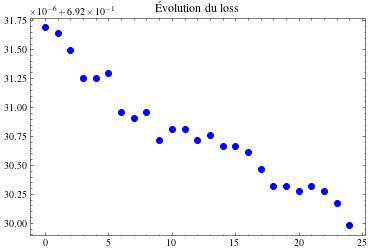

In [11]:
plt.plot([i for i in range(epoch)],loss_evolution,'ob')
plt.title('Évolution du loss')

print(loss_evolution)

In [48]:
#GeV [min,max]

M1_range = M2_range = M3_range = [50, 5000]
mA_range = [50, 5000]
tanB_range = [2, 60]
mu_range = [-10**4, 10**4]
At_range = Ab_range = Atau_range = [-10**4, 10**4]
Mq1L_range = Mq3L_range = [50, 5000]
MuR_range = MdR_range = MtR_range = MbR_range = [50, 5000]
MeL_range = MtauL_range = MeR_range = MtauR_range = [50, 5000]

PMSSM_range_big = [M1_range, M2_range, M3_range, mA_range, tanB_range, mu_range, At_range, Ab_range, 
              Atau_range, Mq1L_range, Mq3L_range, MuR_range, MdR_range, MtR_range, MbR_range,
             MeL_range, MtauL_range, MeR_range, MtauR_range]

PMSSM_min = np.array([i[0] for i in PMSSM_range_big])
PMSSM_max = np.array([i[1] for i in PMSSM_range_big])

PMSSM_sub = np.subtract(PMSSM_max, PMSSM_min)

PMSSM_range = [PMSSM_min,PMSSM_max,PMSSM_sub]

In [14]:
def write_slha(PMSSM_NN, nom_slha):
    f = open(nom_slha, "w")
    
    f.write("BLOCK MODSEL \n")
    f.write(" 1    0              #MSSM \n")
    
    f.write("BLOCK SMINPUTS \n")
    f.write("  1   1.279340000e+02     # alpha^(-1) SM MSbar(M1) \n")
    f.write("  2   1.663700000e-05     # G_Fermi \n")
    f.write("  3   0.1179              # alphas(MS) SM MSbar \n")
    f.write("  4   91.1876             # MZ(pole) \n")
    f.write("  5   4.18                # mb(mb) SM MSbar \n")
    f.write("  6   172.9               # mtop(pole) \n")
    f.write("  7   1.776860000e+00     #m mtau(pole) \n")
    
    f.write("BLOCK MINPAR \n")
    f.write("  3   "+str(PMSSM_NN[4])+"   #tanb \n")
    
    f.write("BLOCK VCKMIN   #CKM param (Wolfenstein) \n")
    f.write("  1   0.22650  #lambda \n")
    f.write("  2   0.790    #A \n")
    f.write("  3   0.141    #rho \n")
    f.write("  4   0.357    #eta \n")
    
    f.write("BLOCK EXTPAR \n")
    f.write("  0   "+str(-1.0)+"               # Q \n")
    f.write("  1   "+str(PMSSM_NN[0])+"        # M1 \n")
    f.write("  2   "+str(PMSSM_NN[1])+"        # M2 \n")
    f.write("  3   "+str(PMSSM_NN[2])+"        # M3 \n")
    f.write("  11   "+str(PMSSM_NN[6])+"       # At \n")
    f.write("  12   "+str(PMSSM_NN[7])+"       # Ab \n")
    f.write("  13   "+str(PMSSM_NN[8])+"       # Atau \n")
    f.write("  23   "+str(PMSSM_NN[5])+"       # Mu \n")
    f.write("  26   "+str(PMSSM_NN[3])+"       # Ma \n")
    f.write("  31   "+str(PMSSM_NN[15])+"      # MeL \n")
    f.write("  32   "+str(PMSSM_NN[15])+"      # MmuL \n")
    f.write("  33   "+str(PMSSM_NN[16])+"      # MstauL \n")
    f.write("  34   "+str(PMSSM_NN[17])+"      # MeR \n")
    f.write("  35   "+str(PMSSM_NN[17])+"      # MmuR \n")
    f.write("  36   "+str(PMSSM_NN[18])+"      # MstauR \n")
    f.write("  41   "+str(PMSSM_NN[9])+"       # Mq1L \n")
    f.write("  42   "+str(PMSSM_NN[9])+"       # Mq2L \n")
    f.write("  43   "+str(PMSSM_NN[10])+"      # Mq3L \n")
    f.write("  44   "+str(PMSSM_NN[11])+"      # MquR \n")
    f.write("  45   "+str(PMSSM_NN[11])+"      # MqcR \n")
    f.write("  46   "+str(PMSSM_NN[13])+"      # MqtR \n")
    f.write("  47   "+str(PMSSM_NN[12])+"      # MqdR \n")
    f.write("  48   "+str(PMSSM_NN[12])+"      # MqsR \n")
    f.write("  49   "+str(PMSSM_NN[14])+"      # MqbR \n")
    
    f.close()

In [50]:
def Oracle(logits, PMSSM_range, ratio, succes_path):
    
    PMSSM_AL = np.add(np.multiply(logits,PMSSM_range[2]),PMSSM_range[0])
    print(PMSSM_AL)
    write_slha(PMSSM_AL, "Advanced NN/AL/pmssm_al.in")    
    
    os.system('./SUSY/softsusy-4.1.9/softpoint.x leshouches < Advanced\ NN/AL/pmssm_al.in > Advanced\ NN/AL/pmssm_al.out')
            
          
    if os.path.getsize('/home/mathis/Stage M1/Advanced NN/AL/pmssm_al.out') == 0 :
        ratio[0]+=1
        return 0
        
    with open('Advanced NN/AL/pmssm_al.out') as slha_out:
        content = slha_out.read()
        if 'SOFTSUSY problem' in content:
            ratio[0]+=1
            return 0
        if 'LSP # Warning' in content:
            ratio[0]+=1
            return 0
    
    
    
    ratio[1]+=1
    commande = 'mv Advanced\ NN/AL/pmssm_al.out '
    nom_fichier = 'pmssm_al_succes_'+str(ratio[1])+'.out'
    os.system(commande+succes_path+nom_fichier)
    return 1   

In [58]:
os.system('rm -r Advanced\ NN/AL/softsusy_succes_IT/')
os.system('mkdir -p Advanced\ NN/AL/softsusy_succes_IT')
succes_path_IT = 'Advanced\ NN/AL/softsusy_succes_IT/'

In [60]:
test = tf.convert_to_tensor([1])
output_test = model(test)
print(output_test)
print(output_test[0])
ratio = [0,0]

print(Oracle(output_test[0], PMSSM_range, ratio, succes_path_IT))

tf.Tensor(
[[0.37874466 0.3752014  0.53303605 0.5545117  0.4216947  0.5080456
  0.48956642 0.49815863 0.4995927  0.5179666  0.6200934  0.52310026
  0.5246815  0.6354299  0.545625   0.5369338  0.5462842  0.5351379
  0.563866  ]], shape=(1, 19), dtype=float32)
tf.Tensor(
[0.37874466 0.3752014  0.53303605 0.5545117  0.4216947  0.5080456
 0.48956642 0.49815863 0.4995927  0.5179666  0.6200934  0.52310026
 0.5246815  0.6354299  0.545625   0.5369338  0.5462842  0.5351379
 0.563866  ], shape=(19,), dtype=float32)
[1924.78607595 1907.24695027 2688.52846324 2794.83304322   26.45829237
  160.91227531 -208.67168903  -36.82732582   -8.1461668  2613.93480897
 3119.46235597 2639.34627175 2647.17346728 3195.37809789 2750.84360838
 2707.8222096  2754.10678387 2698.93256426 2841.13679528]
1


In [61]:
test = tf.convert_to_tensor([0])
output_test = model(test)
print(output_test)
print(output_test[0])
ratio = [0,0]

print(Oracle(output_test[0], PMSSM_range, ratio, succes_path_IT))

tf.Tensor(
[[0.51203734 0.51428425 0.49412724 0.49162298 0.5065828  0.49618828
  0.50189763 0.50257874 0.4980009  0.49610868 0.48237148 0.49730772
  0.49521157 0.48573396 0.4952667  0.49703783 0.49202865 0.49852982
  0.49284247]], shape=(1, 19), dtype=float32)
tf.Tensor(
[0.51203734 0.51428425 0.49412724 0.49162298 0.5065828  0.49618828
 0.50189763 0.50257874 0.4980009  0.49610868 0.48237148 0.49730772
 0.49521157 0.48573396 0.4952667  0.49703783 0.49202865 0.49852982
 0.49284247], shape=(19,), dtype=float32)
[2584.58481729 2595.70705295 2495.9298566  2483.53377283   31.3818022
  -76.23434067   37.95266151   51.57470703  -39.98219967 2505.73797077
 2437.7388224  2511.67320311 2501.2972787  2454.38308269 2501.57019347
 2510.33724844 2485.54183543 2517.72261709 2489.57020491]
1
